# Exercise





### Execsise 1:
Let's look at another column in this DataFrame, YEAR, which represents the year each respondent was interviewed.

Make an unnormalized PMF for YEAR and display the result. How many respondents were interviewed in 2018?

In which year was the repondents is largest, answer by build logic statement. 

In [5]:
dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

In [42]:
from empiricaldist import Pmf, Cdf
import numpy as np
from matplotlib import pyplot as plt

In [26]:
try:
    from statadict import parse_stata_dict
except ImportError:
    !pip install statadict

In [27]:
from statadict import parse_stata_dict

stata_dict = parse_stata_dict(dict_file)

In [28]:
import gzip

fp = gzip.open(data_file)

In [29]:
import pandas as pd

gss = pd.read_fwf(fp, 
                names=stata_dict.names, 
                colspecs=stata_dict.colspecs)
gss.shape

(64814, 8)

In [30]:
gss['YEAR'].value_counts().sort_index()

YEAR
1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
2018    2348
Name: count, dtype: int64

In [31]:
year = gss['YEAR'].value_counts().sort_index()
print(year[2018])

2348


In [32]:
year = gss['YEAR']
pmf_year = Pmf.from_seq(year, normalize=False)
print(pmf_year[pmf_year== max(pmf_year)])

YEAR
2006    4510
Name: , dtype: int64


### Exercise II:

Using cdf_age, compute the fraction of the respondents in the GSS dataset that are older than 60.

In [44]:
age = gss['AGE'].replace([98, 99], np.nan) #clean outliers out
cdf_age = Cdf.from_seq(age)

In [45]:
q = 60
p = cdf_age(q)### P(X =60 or less)
1-p #will show in percent like have to *100  

0.23113368222215336

### Exercise III:

The distribution of income in almost every country is long-tailed, which means there are a small number of people with very high incomes. In the GSS dataset, the column REALINC represents total household income, converted to 1986 dollars (REFERENCED value of Dollas). We can get a sense of the shape of this distribution by plotting the CDF.

Select REALINC from the gss dataset, make a Cdf called cdf_income, and plot it. Remember to label the axes!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


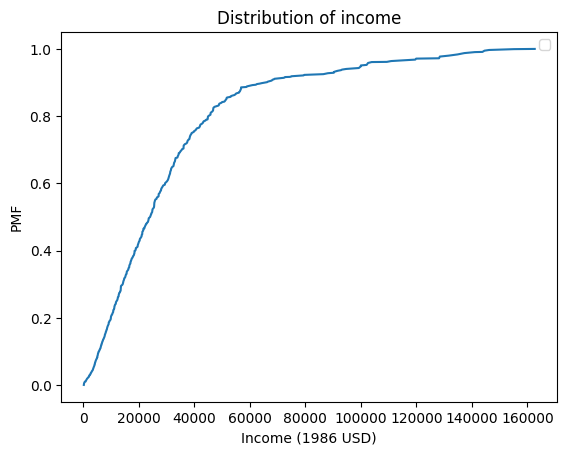

In [49]:
income = gss['REALINC'].replace(0, np.nan)

Cdf.from_seq(income).plot()

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.title('Distribution of income')
plt.legend();